# Chapter 9 Dimensionality Reduction Using Feature Extraction

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
from sklearn.datasets import make_circles

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

## 9.1 Reducing Feature Using Principal Components
PCA(Principle Components Analysis) projects observations onto the principle components of the feature matrixthat retain the most variance.

PCA is unsupervised technique which only considers the feature matrix.

In [2]:
digits = datasets.load_digits()
# convert data to normal distribution
features = StandardScaler().fit_transform(digits.data)
# create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# conduct PCA
features_pca = pca.fit_transform(features)

print("Original number of features =", features.shape[1])
print("Reduced number of features =", features_pca.shape[1])

Original number of features = 64
Reduced number of features = 54


## 9.2 Reducing Features When Data is Linearly Inseparable
`make_circles` returns two classes of linearly inseparable data.

If we use `PCA`, two classes data will linearly projected onto the first principal component such that they will be intertwined.

`KernelPCA` will project data into higher dimension where it is linearly separable. 

Original number of features = 2
number points in first class = 500
number points in second class = 500
Reduced number of features = 1


<Figure size 720x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

(array([480.,  20.,   1.,   1.,   1.,   5.,   6.,  10.,   8.,  23.,  18.,
         22.,  35.,  40.,  40.,  44.,  44.,  62.,  69.,  71.]),
 array([-0.40260197, -0.35114949, -0.29969701, -0.24824453, -0.19679205,
        -0.14533957, -0.09388709, -0.04243461,  0.00901787,  0.06047035,
         0.11192283,  0.16337531,  0.21482779,  0.26628027,  0.31773276,
         0.36918524,  0.42063772,  0.4720902 ,  0.52354268,  0.57499516,
         0.62644764]),
 <BarContainer object of 20 artists>)

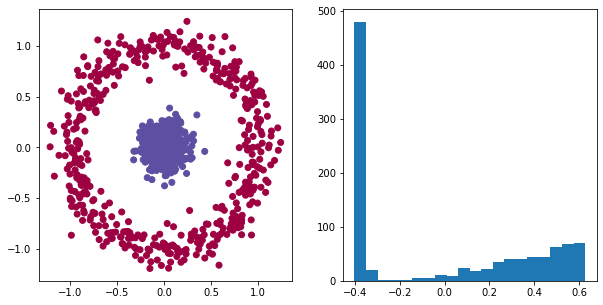

In [3]:
# create linearly inseparable data
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)
# apply kernel PCA with radius basis function kernel
# kernel can be 'poly', 'sigmoid', 'linear'
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

print("Original number of features =", features.shape[1])
distance = features ** 2
distance = distance[:, 0] + distance[:, 1]
print("number points in first class =", distance[distance < 0.25].shape[0])
print("number points in second class =", distance[distance > 0.25].shape[0])
print("Reduced number of features =", features_kpca.shape[1])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(features[:, 0], features[:, 1], c=_, cmap=plt.cm.Spectral)
plt.subplot(1, 2, 2)
plt.hist(features_kpca, bins=20)
plt.show()

## 9.3 Reducing Features by Maximizing Class Separability
PCA maximize the variance in the data. LDA(Linear Discriminant Analysis), maximize the variance between class.

In [4]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
# create and run an LDA, then use it to transform the feature
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)

print("Original number of features =", features.shape[1])
print("Reduced number of features =", features_lda.shape[1])
# the amount of variance explained by each component
print(lda.explained_variance_ratio_)

Original number of features = 4
Reduced number of features = 1
[0.9912126]


In [5]:
# set `n_components=None` to get lda.explained_variance_ratio_
# then we can determine `n_components` from lda.explained_variance_ratio_
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)
lda_var_ratios = lda.explained_variance_ratio_

def select_n_components(var_ratio, goal_var:float) -> int:
    # set initial variance explained so far
    total_variance = 0.0
    # set initial number of features
    n_components = 0
    # for the explained variance of each feature
    for explained_variance in var_ratio:
        # add the explained variance to the total
        total_variance += explained_variance
        # add one to number of components
        n_components += 1
        # break when we reach the goal level of explained variance
        if total_variance >= goal_var:
            break
    return n_components

select_n_components(lda_var_ratios, 0.95)

1

## 9.4 Reducing Features Using Matrix Factorization
Non-negative Matrix Fatorization(NMF) is an unsupervised technique for linear dimensionality reduction. It factor a matrix into two matrix, which reduces the dimensions.

In [6]:
digits = datasets.load_digits()
features = digits.data
# create, fit and apply NMF
nmf = NMF(init='nndsvd', n_components=10, random_state=1, max_iter=1000)
features_nmf = nmf.fit_transform(features)
print("Original number of features =", features.shape[1])
print("Reduced number of features =", features_nmf.shape[1])

Original number of features = 64
Reduced number of features = 10


## 9.5 Reducing Features on Sparse Data
PCA often uses non-truncated SVD, while TSVD will return a n by n matrix where n is pre-defined.

In [7]:
digits = datasets.load_digits()
features = StandardScaler().fit_transform(digits.data)
# make sparse matrix
features_sparse = csr_matrix(features)
# create a TSVD
tsvd = TruncatedSVD(n_components=10)
# conduct TSVD on sparse matrix
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)
print("Original number of features =", features.shape[1])
print("Reduced number of features =", features_nmf.shape[1])
print(tsvd.explained_variance_ratio_)

Original number of features = 64
Reduced number of features = 10
[0.12033916 0.09561054 0.08444415 0.06498408 0.04860154 0.04214116
 0.03942077 0.03389287 0.02997961 0.02931918]


In [8]:
# set `n_components` to get tsvd.explained_variance_ratio_
# then we can determine `n_components` from tsvd.explained_variance_ratio_
tsvd = TruncatedSVD(n_components=features_sparse.shape[1] - 1)
features_tsvd = tsvd.fit(features)
tsvd_var_ratios = tsvd.explained_variance_ratio_

def select_n_components(var_ratio, goal_var:float) -> int:
    # set initial variance explained so far
    total_variance = 0.0
    # set initial number of features
    n_components = 0
    # for the explained variance of each feature
    for explained_variance in var_ratio:
        # add the explained variance to the total
        total_variance += explained_variance
        # add one to number of components
        n_components += 1
        # break when we reach the goal level of explained variance
        if total_variance >= goal_var:
            break
    return n_components

select_n_components(tsvd_var_ratios, 0.95)

40